# TP 6 : Visualisation et Simulation 

## I. Visualisation avec matplotlib

Matplotlib est une excellente librairie graphique pour générer des figures scientifiques en 2D et 3D. Parmi les avanatges de cette librairie, on peut citer :

* prise en main facile,
* des figures de haute qualité et plusieurs formats PNG, PDF, SVG, EPS et PGF,
* le texte peut être formatté en $\LaTeX$.



Importer le module `matplotlib` pour pouvoir utiliser dans votre programme.

In [21]:
import matplotlib.pyplot as plt

# affichage des graphiques sur Jupyter
%matplotlib inline 

### "Scatter plot" (nuage de points)

Commençons par créer des points à afficher. 

In [22]:
xs = range(1, 25)
ys = [1 / x for x in xs]


Pour dessiner un "scatter plot" (nuage de point), on utilise la méthode `scatter`.

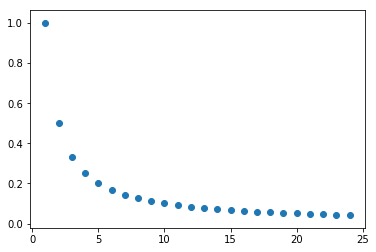

In [23]:
plt.scatter(xs, ys)

On peut combiner ce graphique avec un autre ensemble de points. Créons d'autres points.

In [24]:
zs = [1 / (25 - x) for x in xs]

Afficher les deux ensembles de points dans un même graphique.

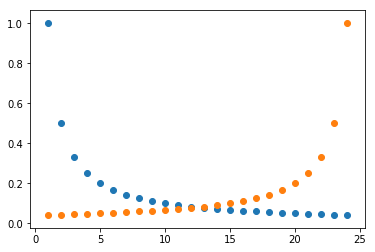

In [25]:
plt.scatter(xs, ys)
plt.scatter(xs, zs)

Pour ajouter une légende, des axes et un titre à notre graphique (qui peuvent include du code $\LaTeX$) : 


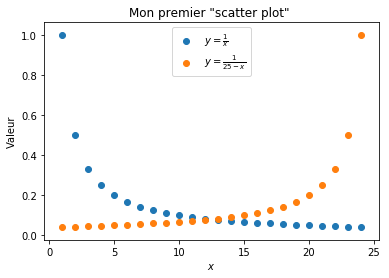

In [26]:
plt.scatter(xs, ys, label="$y=\\frac{1}{x}$")
plt.scatter(xs, zs, label="$y=\\frac{1}{25 - x}$")

plt.xlabel("$x$")
plt.ylabel("Valeur")
plt.title("Mon premier \"scatter plot\" ")

plt.legend()

**Questions : **
1. Dessiner un "scatter plot" avec les points suivants :
```
xs = range(200)
ys = [(100 - x) ** 2 for x in xs]
```

2. Ajouter une légende, des axes et un titre au graphique.



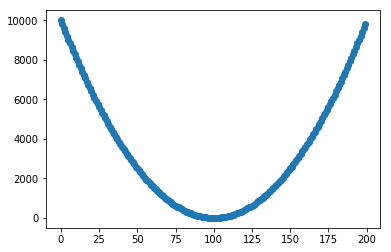

In [27]:
xs = range(200)
ys = [(100 - x) ** 2 for x in xs]
plt.scatter(xs, ys)

## II. Simulation d'un pendule

Le but de cette partie est de simuler un pendule simple.

On considère un pendule simple décrit par le modèle suivant : $$\ddot\theta  + \frac{b}{m} \dot\theta + \frac{g}{L} \sin(\theta) = 0,$$

avec 
* $\ddot \theta$ : accélération angulaire du pendule
* $\dot \theta$ : vitesse angulaire
* $\theta$ : élongation angulaire
* $g$ : accélération due à la pesanteur (${\displaystyle g\simeq 9,81\ m.s^{-2}}$). 
* $L$ : la longueur du pendule
* $b$ : constante
* $m$ : poids de la masse

En convertissant cette équation différentielle de second ordre en un système d'équations du premier ordre, on obtient : 

$\dot \theta_2 = -\displaystyle\frac{b}{m}\theta_2 - \frac{g}{L} \sin(\theta_1)$

$\dot \theta_1 = \theta_2$

avec $\theta_1 = \theta$ et $\theta_2 = \dot \theta$.

Importer les libraires : math (fonctions mathématiques), matplotlib (visualisation), scipy (calcul sicentifique) et os (interface système d'exploitation). Pour plus de sétails sur l'importation de modules en Python, voir la Section IV.

In [28]:
import math
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import os

Fixer les paramètres du modèle.

In [29]:
g = 9.81        # accélération due à la pesanteur (m/s^2)
L = 1           # longueur du pendule (m)
b = 1.5         # facteur constant (kg/s)
m = 1           # masse (kg)

La fonction suivante permet d'afficher le pendule en fonction des ses coordonnées cartésiennes.

In [30]:
def penduleFromXY(x,y,time):
    plt.figure()
    plt.plot(x,y,'bo',markersize=20)
    plt.plot([0,x], [0,y])
    plt.xlim(-L-0.5,L+0.5)
    plt.ylim(-L-0.5,L+0.5)
    plt.xlabel('x-direction')
    plt.ylabel('y-direction')
    plt.title("Temps :  %.2f" %time)

Le code suivant permet d'afficher le pendule avec un angle 0. Modifier le code de `x` et `y` pour donner une représentation qui dépende de l'angle. 

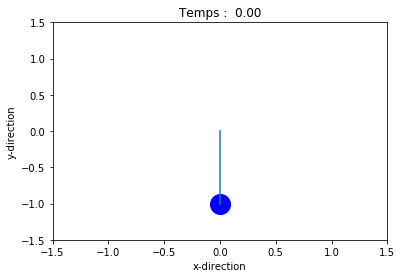

In [31]:
penduleFromXY(0,-L,0)
plt.show()

On souhaite déterminer la position du pendule en fonction de son angle $\theta$. La formule mathémathique nous donne :
    
$x = \sin(\theta)\times L$

$y = -cos(\theta)\times L$
    
Les fonctions trigonométriques de python peuvent être appelées de la manière suiante :

In [32]:
pi = 3.14159
x = np.sin(pi/4)
y = np.cos(pi/3)
print(x,y)

0.7071063120935576 0.5000007660251953


**Questions :** 
1. Ecrire une fonction qui prend en paramètre un angle et affiche le pendule à la position déterminée en fonction de cet angle.

2. Afficher le pendule à la position $\displaystyle\frac{\pi}{4}$.

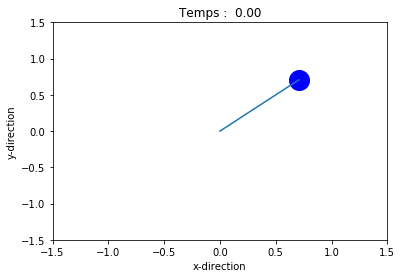

In [33]:
# Code à compléter
def pendule(angle, time):
    x = np.sin(angle)
    y = np.cos(angle)
    penduleFromXY(x, y, time)
    #plt.show()
pendule(math.pi/4, 0)

Nous allons désormais déterminer l'angle en fonction du temps en partant des conditions initiales qui sont l'angle initial et la vitesse (angulaire) initiale. On détermine l'accélération du pendule grâce à l'équation différentielle vue plus haut.

In [34]:
def acceleration(angle,speed): #acceleration angulaire
    return -b/m*speed -g/L*np.sin(angle)

print (acceleration(pi/4,0))

-6.9367129216378


Nous allons discrétiser le temps de manière à utiliser l'approximation suivante.

$angle(t+timeStep) = angle(t)+speed(t)\times timeStep$

$speed(t+timeStep) = speed(t) + acceleration(t)\times timeStep$

**Question :** Ecrire une fonction qui renvoie une liste de deux éléments `[newAngle,newSpeed]` après l'écoulement de `timeStep` en utilisant l'approximation si dessus.

In [35]:
# Code à compléter
def calcNewTimeStep(angle, speed, timeStep):
    newAngle = angle + speed * timeStep
    newSpeed = speed + acceleration(angle, speed) * timeStep
    return [newAngle, newSpeed]

**Question :** Ecrire une fonction `trajectory` qui renvoie la liste des angles et la liste des vitesses successives avec un écart de `timeStep`. La liste doit être de longueur `stepCount` donnée en paramètre.

In [36]:
# Code à compléter
def trajectory(initialAngle, initialSpeed, timeStep, stepCount):
    angles, speeds = [], []
    oldAngle, oldSpeed = initialAngle, initialSpeed
    for i in range(stepCount + 1):
        newStep = calcNewTimeStep(oldAngle, oldSpeed, timeStep)
        angles.append(newStep[0])
        oldAngle = newStep[0]
        speeds.append(newStep[1])
        oldSpeed = newStep[1]
    return [angles, speeds]

La fonction `trajectory` est utilisée dans le code suivant entre le temps 0 et 15 secondes avec des intervalles de 0.1 seconde avec un angle de 0 radian et une vitesse angulaire de 3 radians/s.

In [37]:
stepCount = 150
startingTime = 0
endTime = 15
timeStep = 0.1
initialAngle = 0
initialSpeed = 3
steps = np.arange(startingTime, endTime + timeStep, timeStep)
[angles, speeds] = trajectory(initialAngle, initialSpeed, timeStep, stepCount)

**Question :** Utiliser `steps`(abscisse) `angles` et `speeds`(les ordonnées des deux courbes) pour afficher le résultat obtenu dans un pyplot. Les légendes des  axes doivent être *Temps(s)* pour les abscisses et  *'Dép. angulaire(rad) and Vitesse angulaire (rad/s)'* pour les ordonnées.



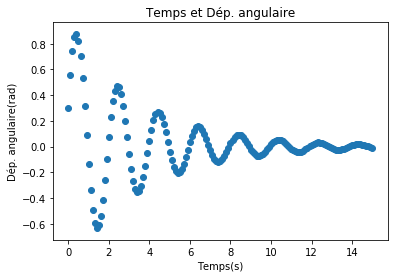

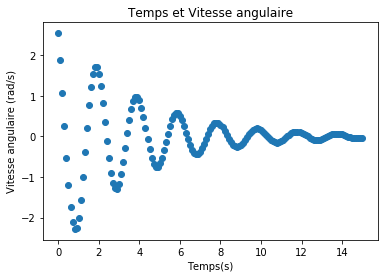

In [54]:
# Code à compléter
plt.figure()
plt.title("Temps et Dép. angulaire")
plt.scatter(steps, angles)
plt.xlabel("Temps(s)")
plt.ylabel("Dép. angulaire(rad)")
plt.show()

plt.figure()
plt.title("Temps et Vitesse angulaire")
plt.scatter(steps, speeds)
plt.xlabel("Temps(s)")
plt.ylabel("Vitesse angulaire (rad/s)")
plt.show()

Le programme suivant permet de sauvegarder toutes les figures de la simulation.

In [39]:
def pendulePrint(angle, time):
    pendule(angle, time)
    filenumber = format(time, "05")
    filename = "image{}.png".format(filenumber)
    plt.savefig(filename)
    plt.close()

for step in range(0, len(angles)) :
    pendulePrint(angles[step], step)

Créer une video à partir des images enregistrées (utilisant la librairie ffmpeg).

In [40]:
os.system("ffmpeg -f image2 -r 20 -i image%05d.png -vcodec mpeg4 -y pendule.avi")

1

**Question** : changer la position initiale du pendule et refaire la simulation.

In [41]:
# Code à compléter

## III. Histogramme

On sintéresse ici aux histogrammes. Un histogramme est un graphique qui permet la représentation de la répartition d'une variable par des colonnes verticales. 

**Questions** : 

1. Ecrire un programme qui permet de simuler un lancé de dé. Pour ceci utiliser  la méthode `random.randint` qui permet de retourner aléatoirment un entier.

2. Répéter la simulation plusieurs fois en stockant le résultat dans une variable nommée `d` et afficher le histogramme avec la commande `h=plt.hist(d,range=[1, 6.2], rwidth=0.5, bottom=0)`.

3. Analyser l'affichage obtenu.

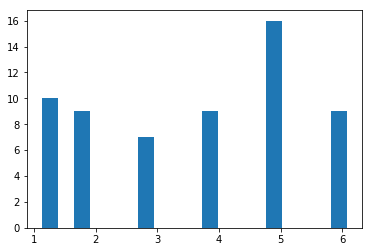

In [42]:
# Code à compléter
import random
d = [random.randint(1, 10) for i in range(100)]
h = plt.hist(d, range=[1, 6.2], rwidth=0.5, bottom=0)

On s'intéresse maintenant à générer des points à partir d'une loi de distribution. Commençons par créer des points générés à partir de la loi exponentielle par exemple.

In [43]:
import random  # permet de créer des données aléatoires
nombre_de_points = 50000
d = [random.expovariate(lambd=.5) for _ in range(nombre_de_points)]

Dessinons maintenant l'histogramme.

(array([3.3008e+04, 1.1326e+04, 3.7840e+03, 1.2870e+03, 3.7900e+02,
        1.3900e+02, 5.0000e+01, 1.7000e+01, 7.0000e+00, 3.0000e+00]),
 array([6.25539524e-06, 2.16897030e+00, 4.33793434e+00, 6.50689838e+00,
        8.67586243e+00, 1.08448265e+01, 1.30137905e+01, 1.51827546e+01,
        1.73517186e+01, 1.95206826e+01, 2.16896467e+01]),
 <a list of 10 Patch objects>)

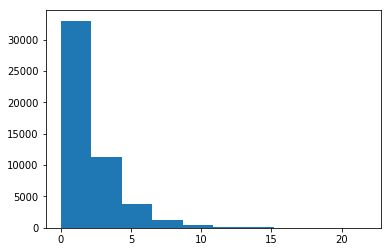

In [44]:
plt.hist(d)

Nous pouvons changer le nombre de rectangles et les normaliser (afficher des probabilités au lieu de fréquences)


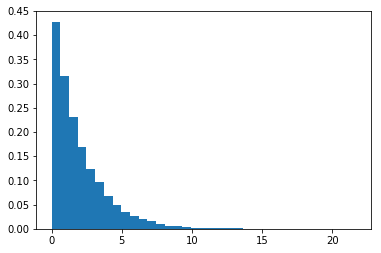

In [45]:
plt.hist(d, bins=35, density=True);

Il est connu que la loi exponentielle  de paramètre $\lambda$ a une fonction de densité de probabilité $$f(x) = \lambda e^{-\lambda x}.$$

On peut inclure la courbe de la densité de probabilité dans le graphique.

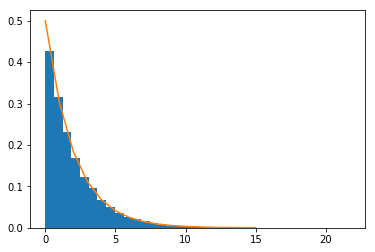

In [46]:
import math

lambd = 0.5
valeurs = range(16)
fs = [lambd * math.exp(- lambd * x ) for x in valeurs]

plt.hist(d, bins=35, density=True)
plt.plot(valeurs, fs)

Il est possible d'enregistrer la figure dans un fichier.

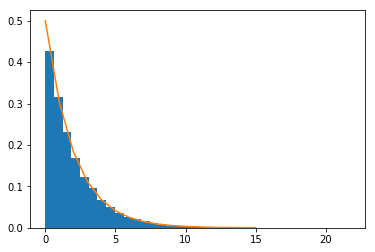

In [47]:
plt.hist(d, bins=35, density=True)
plt.plot(valeurs, fs)
plt.savefig("loi_exponentielle.pdf")

**Questions** : 

1.   Utilisant le même code que pour les "scatter plots", ajouter une légende, des axes et un titre à l'histogramme.

2.   Représenter graphiquement un histogramme de données générées par une loi normale (utilisant `random.normalvariate`).



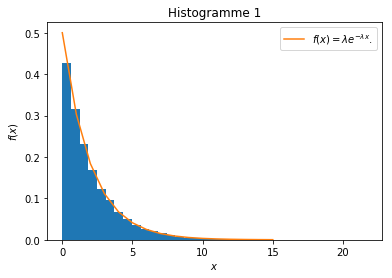

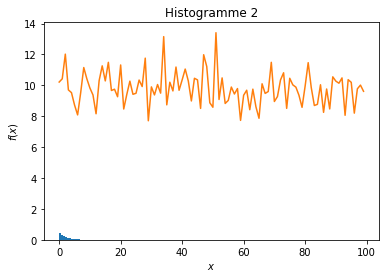

In [65]:
# Code à compléter
plt.figure()
plt.title("Histogramme 1")
plt.hist(d, bins=35, density=True)
plt.plot(valeurs, fs, label="$f(x) = \lambda e^{-\lambda x}.$")
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.legend()

arrx = range(100)
arry = [random.normalvariate(10,1) for i in arrx]
plt.figure()
plt.title("Histogramme 2")
plt.hist(d, bins=35, density=True)
plt.plot(arrx, arry)
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.show()

## IV. Les modules en Python

* Si votre programme devient long, vous pouvez vouloir le couper en plusieurs fichiers pour une maintenance plus facile. Vous pouvez également vouloir utiliser dans plusieurs programmes une fonction pratique que vous avez écrite sans copier sa définition dans chaque programme. 

* Les modules en Python permettent de construire un programme utilisant du code réparti dans plusieurs fichiers.

* Un module Python est un fichier `.py` contenant des définitions et des instructions Python.

* La commande `import` permet à un programme d'accéder à un module.

**Questions** : 
1. Créer un fichier `cercle.py` contenant l'instruction `pi = 3.14159`  permettant la déclaration de la variable $\pi$. Ajouter dans le fichier les fonctions permettant de calculer :
     * l'aire d'un cercle
     * la circonférence d'un cercle
     * la surface d'une sphère
     * le volume d'une sphere
```  
```

2. Saisir et exécuter le code ci-dessous.
```
import cercle
print(cercle.pi)
print(cercle.aire(3))
print(cercle.circonference(3))
print(cercle.surfaceSphere(3))
```
```  
```
3.  Exécuter le code ci-dessous et comparer le résultat avec 2. 
```
from circle import *
print(pi)
print(cercle.pi)
```




In [66]:
# Code à compléter
import cercle
print(cercle.pi)
print(cercle.aire(3))
print(cercle.circonference(3))
print(cercle.surfaceSphere(3))

3.14159
28.27431
18.849539999999998
113.09724


In [68]:
from cercle import *
print(pi)
print(cercle.pi) # ERR ON QUESTION

3.14159
3.14159
